# P346 End-sem exam

In [4]:
from math import *
import matplotlib.pyplot as plt
import Library.pRNG as Random
import Library.Read_matrix as Read
import Library.Linear_eqsolver as Solve
import Library.Root_finder as Root
import Library.Numerical_integrator as Integrate
import Library.ODE_solver as ODE
import Library.Eigenvalue as Eigen
import Library.Data_fitting as Fit

## Question 1

In [10]:
# Reading the matrix from the input file
A = Read.read_Mat(r"Endsem Input files/Input_matrixQ1.txt")

# Checking if inverse of the matrix exists and finding it using LU decomposition
Solve.LU_inverse(A)


Inverse of the matrix exists


[[-0.708, 2.531, 2.431, 0.967, -3.902],
 [-0.193, 0.31, 0.279, 0.058, -0.294],
 [0.022, 0.365, 0.286, 0.051, -0.29],
 [0.273, -0.13, 0.132, -0.141, 0.449],
 [0.782, -2.875, -2.679, -0.701, 4.234]]

## Question 2

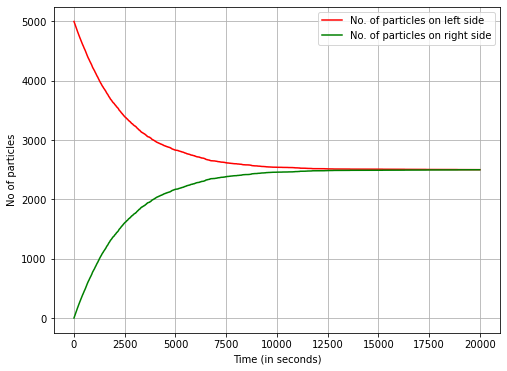

From the graph, at equilibrium state of the system ~ 2500 particles will be present on each side.


In [11]:
N0 = 5000

nl = 5000
nr = 0
Nl = [5000]
Nr = [0]
time = [0]
rand = Random.LCG(3,20000)

for t in range(20000):
    if rand[t] <= nl/N0:
        nl -= 1
        nr += 1
        
    if rand[t] <= 1-nl/N0:
        nl += 1
        nr -= 1
        
    Nl.append(nl)
    Nr.append(nr)
    time.append(t+1)

# Plotting the no. of particles vs. time to determine the equilibrium state
plt.figure(figsize=(8,6))
plt.plot(time,Nl,color='r',label='No. of particles on left side')
plt.plot(time,Nr,color='g',label='No. of particles on right side')
plt.ylabel('No of particles')
plt.xlabel('Time (in seconds)')
plt.legend()
plt.grid()
plt.show()

print("From the graph, at equilibrium state of the system ~ 2500 particles will be present on each side.")

## Question 3

Solution using Newton-Raphson method = 0.9585863567287033

Table for convergence of Newton-Raphson method
Step no.     x_i 		 Value at x_i 		 Error
1  	  2.4999975 		 -27.95612833 		 2.4999975
2  	  1.84434474 		 -9.16355244 		 0.65565276
3  	  1.33490526 		 -2.57215403 		 0.50943948
4  	  1.04498043 		 -0.47123768 		 0.28992483
5  	  0.96393635 		 -0.02743851 		 0.08104408
6  	  0.95860791 		 -0.00011008 		 0.00532845
7  	  0.95858636 		 -0.0 		 2.155e-05
8  	  0.95858636 		 -0.0 		 0.0

Convergence plot for Newton-Raphson method


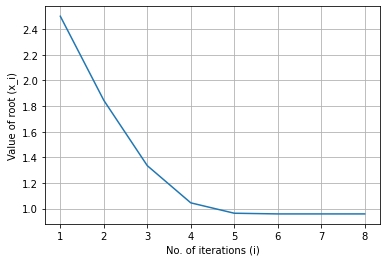

Therefore, maximum value to which the spring can be stretched = 0.9585863567287033 units


In [12]:
# Given equation for force F(x)
fx = lambda x: 2.5 - x*exp(x)

# Finding solution using Newton-Raphson method
root, step, x, value, error = Root.Newton_Raphson(fx, 0, 1e-6)
print("Solution using Newton-Raphson method =", root)
print()
# Tabulating the data for convergence to root vs. no. of iterations
Root.Convergence_table(step, x, value, error, "Newton-Raphson method")
Root.Convergence_plot(step, x, "Newton-Raphson method")

print("Therefore, maximum value to which the spring can be stretched =", root, "units")


## Question 4

In [13]:
# Given equation for Time period of oscillation
T = lambda phi: (4/sqrt(9.8))*(1/sqrt(1-(((sin(pi/8))**2)*((sin(phi))**2))))

# Integrating using Simpson method for N = 10
time_period = Integrate.Simpson_int(T,0,pi/2,10)

print("Time period of the pendulum =", time_period, "seconds")


Time period of the pendulum = 2.0873200174795925 seconds


## Question 5

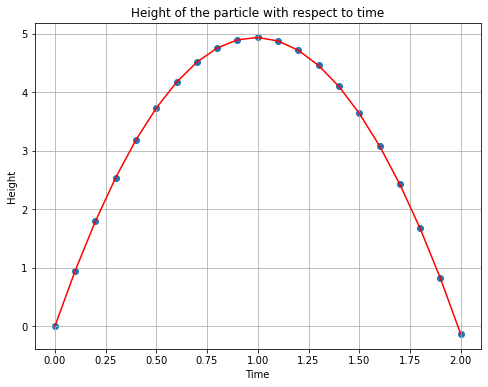

Therefore, maximum height reached by the particle = 4.933830677673028 units


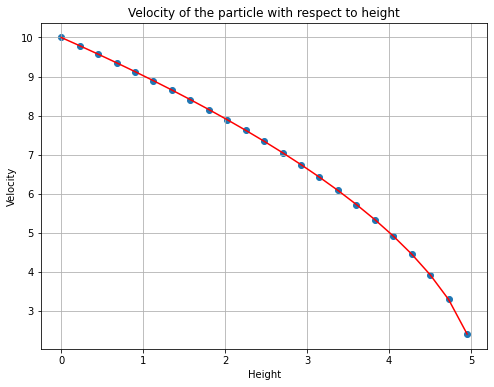

In [5]:
# Defining double derivative of y wrt t
def d2ydt2(t, y, v):
    return (-0.02*v - 10)

# Defining derivative of y wrt t
def dydt(t, y, v):
    return v

# Defining derivative of v wrt y
def dvdy(y, v):
    return (-0.02 - 10/v)

# Solving the 2nd order ODE: d2y/dt2 = -0.02*dy/dt - 10, using RK4 method
time, height = ODE.RK4_order2(d2ydt2, dydt, 0, 0, 10, 2, 0.1)

# Solving the 1st order ODE: dv/dy = -0.02 - 10/v, using RK4 method
Height, Velocity = ODE.RK4_order1(dvdy, 0, 10, 10, 0.45)

# Plotting the height wrt time
plt.figure(figsize=(8,6))
plt.plot(time, height, color ='r')
plt.scatter(time, height)
plt.title("Height of the particle with respect to time")
plt.xlabel("Time")
plt.ylabel("Height")
plt.grid()
plt.show()
print("Therefore, maximum height reached by the particle =", max(height), "units")

# Plotting the velocity wrt height
plt.figure(figsize=(8,6))
plt.plot(Height, Velocity, color ='r')
plt.scatter(Height, Velocity)
plt.title("Velocity of the particle with respect to height")
plt.xlabel("Height")
plt.ylabel("Velocity")
plt.grid()
plt.show()

## Question 6

In [15]:
# Reading the matrix from the input file
M = Read.read_Mat(r"Endsem Input files/Input_matrixQ6.txt")

# Finding its largest eigenvalue and corresponding normalized eigenvector
guess_mat = [[1],[1],[1],[1]]
e_value, e_vector, iterations = Eigen.Dominant_eigenvalue(M,guess_mat,0.001)

print("Largest eigenvalue of the matrix =", e_value)
print("Corresponding normalized eigenvector =", e_vector)
print("No. of iterations =", iterations)


Largest eigenvalue of the matrix = 7.9954229472778735
Corresponding normalized eigenvector = [[-0.19841693828127313], [0.6940687096178141], [0.6920255373085772], [2.5403210838495812e-05]]
No. of iterations = 6


## Question 7

The curve fit for the data is given by the eqn. =
0.25462950721154864*x^0 + -1.1937592138092255*x^1 + -0.45725541238296974*x^2 + -0.8025653910658194*x^3 + 0.01323942747739673*x^4 + 


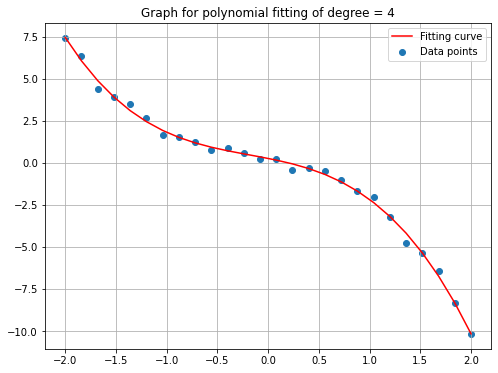

In [16]:
# Reading the fitting data from the input file
X,Y = Fit.Read_data(r"Endsem Input files/esem4fit.txt")

# Performing polynomial fit for the data with degree 4
fitting, polynomial = Fit.Polynomial_fit(X,Y,4)
print("The curve fit for the data is given by the eqn. =")
print(polynomial)
Fit.Polyfit_graph(X,Y,fitting,4)
